# Notebook example

In [1]:
# Load basic libraries from pyhod
import numpy as np
import pyhod.hodfunc as hf
import pyhod.utils as utils

## Load all input parameters

In [2]:
# To facilitate the usage of the functions on pyHOD we set the relevant parameters in the config.py module as a dictionary.
import config

In [3]:
params = config.input_params_nb()

## update params if not done in config.py

In [4]:
params['ifile'] = 'Quijote_Halos/0'
params['cat'] = 'Quijote_Halo'
params['outfile'] = '%s_HOD0_%s_1Gpc_z0.5_run0.npz'%(params['cat'],params['method'] )

In [5]:
# check all the input parameters 
for key,value in params.items():
    print(key, ' : ', value)

box  :  1000
grid  :  256
z  :  0.5
Deltac  :  200
M_star  :  16709920000000.0
cat  :  Quijote_Halo
om  :  0.3175
ol  :  0.6825
h  :  0.6711
method  :  NFW
model  :  Zheng
logMmin  :  13.0
alpha  :  0.75
logM1  :  14.25
sigmalogM  :  0.2
logM0  :  13.1
ifile  :  Quijote_Halos/0
snapshot  :  snapshot
outfile  :  Quijote_Halo_HOD0_NFW_1Gpc_z0.5_run0.npz
iRSD  :  0
zerr  :  0
seed  :  5761


//
Notice the random number generator is fixed in the parameter file.

use

> params['seed'] = newvalue

to change the random realization used in  'hf.cent_sat' and 'hf.sample_catalog'.

#  Read catalog

In [6]:
#pyHOD contains a library to help read different halo catalogs such as Quijote Halos or EoS Halo catalogs.
import pyhod.read as read

In [7]:
data = read.readcats(params = params)



Loading halos from
    --->FILE:Quijote_Halos/0


In [8]:
print('Loaded %d halos, in the mass rage (%.2e,%.2e).\n' %(len(data[:,0]),data[:,0].min(),data[:,0].max()))

Loaded 309740 halos, in the mass rage (1.31e+13,2.09e+15).



#  Running HOD

In the basic implementation we follow the steps:
1. Compute the mean number of Galaxies $<N_{cen}>$ using the 5 HOD parameters (logMmin', 'sigmalogM','logM0','alpha','logM1')
1. Draw the galaxy samples

In [9]:
# COMPUTE MEAN NUMBER OF GALAXIES
HOD_param = params['logMmin'], params['sigmalogM'], params['logM0'], params['alpha'], params['logM1']
centrals, satellites = hf.cent_sat(data,*HOD_param, params = params)


Computing mean number central and satellites...

Drawing central and satellites...


In [11]:
galaxy_pos, galaxy_vel, galaxy_type, halo_group = hf.sample_catalog(data, centrals, satellites, params = params)

Doing NFW

Assigning position and velocities for satellites galaxies...


Total number of galaxies: 356317
Total number of central: 297213
Total number of satellites: 59104



In [12]:
if params['iRSD'] > 0: 
    galaxy_pos = utils.displaceRSD(galaxy_pos, galaxy_vel)

In [13]:
output = params['outfile']
print('\nNow Saving at:\n    --->OUTPUT FILE:%s\n'%output)
np.savez_compressed(output, pos=galaxy_pos, vel =galaxy_vel, gtype = galaxy_type)


Now Saving at:
    --->OUTPUT FILE:Quijote_Halo_HOD0_NFW_1Gpc_z0.5_run0.npz



# Visual Inspection

In [15]:
import matplotlib.pyplot as plt

In [16]:
mycat = np.load(output)
vec = np.array([mycat['pos'][:,0],mycat['pos'][:,1],mycat['pos'][:,2],mycat['gtype']]).T    
npart = len(vec[:,0])
print('Found %d galaxies.' %npart)
print('Number density: %.2e (h/Mpc)^3'%(npart/params['box']**3))

Found 356317 galaxies.
Number density: 3.56e-04 (h/Mpc)^3


In [17]:
mask= (vec[:,2]>250)&(vec[:,2]<300)
pos_slice = vec[mask,:]

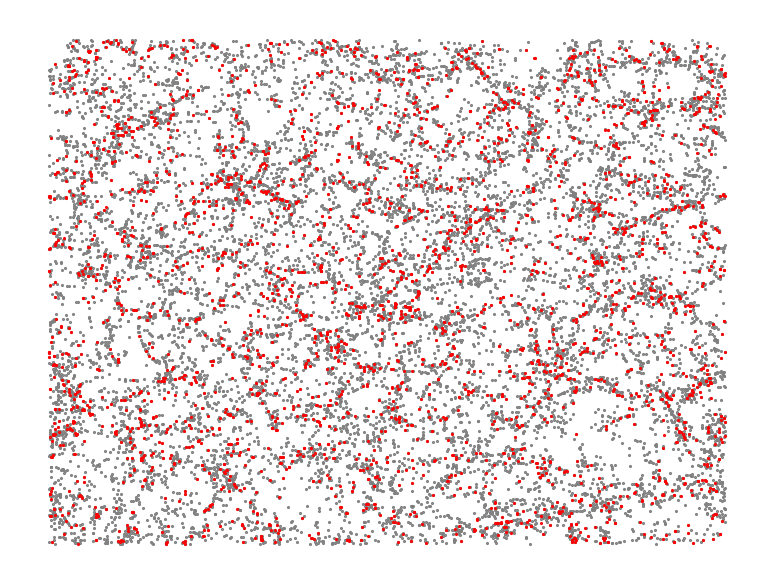

In [18]:
fig ,ax1 = plt.subplots(dpi=150)

central = pos_slice[:,0:2][pos_slice[:,-1].astype(bool)]
satellites  = pos_slice[:,0:2][~pos_slice[:,-1].astype(bool)]

ax1.scatter(central[:,0],central[:,1],color='grey',s=0.25)
ax1.scatter(satellites[:,0],satellites[:,1],color='red',s=0.25)

plt.axis('off')
plt.show()